In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load paths
# path_VM = ../../dvm-dos-tem/mads_calibration/'
samples='sample_matrix.csv'
results='results.txt'
results_new='results.csv'
path_EML='EML21/'
path_MD3='MD3/'
path_MD1='MD1/'
path_TK='TK/'
path_USPrr='US-Prr/SA/'

In [3]:
#Load Functions
def read_samples_resutls(paths,pathr):
    df_param = pd.read_csv(paths)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]

def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

def get_by_index(zscore,index_list):
    return pd.Series([zscore[0][iname] for iname in index_list])

def calculate_nmae(df_model,ymodel):
    # MAE is computed by taking the absolute difference between each target value and its corresponding 
    # model output value (over all runs), and then taking the average of these absolute differences. n=num simulations
    # MAE = (1 / n) * Σ|target_i - model_i|
    # Calculate the mean of the absolute values of the target values.
    # Mean Absolute Target Value = (1 / n) * Σ|target_i|
    # NMAE = (MAE / Mean Absolute Target Value) * 100

    '''    
    df_model: model dataframe
    ymodel: full dataframe constrained by error
    '''
    targets = df_model.iloc[-1, :]
    [n,m]=np.shape(ymodel)
    df=(abs(ymodel.iloc[:-1,:] - df_model.iloc[-1, :]))
    column_sums = df.sum(axis=0)
    mae = column_sums /(n-1) 
    mean_abs_target = np.abs(targets).mean()
    nmae = (mae / mean_abs_target) * 100
    return nmae

def site_metric_matrix(metric_matrix, metric):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
 
    n_rows, n_cols = metric_matrix.shape
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(figsize=(7, 15))
    sns.heatmap(metric_matrix, cmap="coolwarm", annot=True, fmt=".2f",
               cbar_kws={'label': 'relative score',"orientation": 'horizontal'},
               annot_kws={"fontsize":11})
    ax.set_xlabel('Sites',FontSize=14)
    ax.set_ylabel('Targets',FontSize=14)
    ax.set_title(metric + ' Matrix',FontSize=14)
    plt.show()
    return

## GPP targets

In [17]:
# Load EML21
rmetric='r2rmse'
nelem=10

sa_folder='sa_cmax_EML21_090_AK/'
[df_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
df_model_EML0.columns = output_name
df_model_EML=df_model_EML0.iloc[:,:-2].copy()
xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

z_gpp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],
                    df_model_EML)

# Load MD3
sa_folder = 'sa_cmax_MD3_050_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

z_gpp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],
                    df_model_MD3)

# Load MD1
sa_folder = 'SA-MD1-STEP1/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+results)
output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

z_gpp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],
                    df_model_MD1)

# Load TK
sa_folder = 'sa-cmax-TK-075-EJ/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model_TK.columns = output_name_TK
xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

z_gpp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],
                   df_model_TK)

# Load US-Prr
sa_folder = 'STEP1-cmax-GPP/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['GPP0','GPP1','GPP2','GPP3','GPP4']
df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)

z_gpp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],
                      df_model_USPrr)

gpp_eml=get_by_index(z_gpp_eml,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6'])
gpp_md1=get_by_index(z_gpp_md1,['GPP0','GPP1','GPP2','GPP3'])
gpp_tk=get_by_index(z_gpp_tk,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7'])
gpp_USPrr=get_by_index(z_gpp_USPrr,['GPP0','GPP1','GPP2','GPP3','GPP4'])
gpp_md3=get_by_index(z_gpp_md3,['GPP0','GPP1','GPP2','GPP3'])


## GPP targets (old)

In [5]:
# Load EML21
sa_folder='sa_cmax_EML21_090_AK/'
[df_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
df_model_EML0.columns = output_name
df_model_EML=df_model_EML0.iloc[:,:-2].copy()
xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=0.97)

# Load MD3
sa_folder = 'sa_cmax_MD3_050_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=0.97)

# Load MD1
sa_folder = 'SA-MD1-STEP1/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+results)
output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=0.97)

# Load TK
sa_folder = 'sa-cmax-TK-075-EJ/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
df_model_TK.columns = output_name_TK
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.97)

# Load US-Prr
sa_folder = 'STEP1-cmax-GPP/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['GPP0','GPP1','GPP2','GPP3','GPP4']
df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.97)

z_gpp_eml = z_score(ymodel_EML,df_model_EML)
z_gpp_md3 = z_score(ymodel_MD3,df_model_MD3)
z_gpp_md1 = z_score(ymodel_MD1,df_model_MD1)
z_gpp_tk = z_score(ymodel_TK,df_model_TK)
z_gpp_USPrr = z_score(ymodel_USPrr,df_model_USPrr)

gpp_eml=get_by_index(z_gpp_eml,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6'])
gpp_md1=get_by_index(z_gpp_md1,['GPP0','GPP1','GPP2','GPP3'])
gpp_tk=get_by_index(z_gpp_tk,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7'])
gpp_USPrr=get_by_index(z_gpp_USPrr,['GPP0','GPP1','GPP2','GPP3','GPP4'])
gpp_md3=get_by_index(z_gpp_md3,['GPP0','GPP1','GPP2','GPP3'])


## NPP targets

In [18]:
# NPP targets
# Load EML21
per_number=0.5
sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
[df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
df_model_EML.columns = output_name
xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

z_npp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_EML)
npp_eml=get_by_index(z_npp_eml,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6'])

# Load MD3
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
z_npp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
npp_md3=get_by_index(z_npp_md3,['NPP0','NPP1','NPP2','NPP3'])

# Load MD1
sa_folder = 'SA-MD1-STEP2/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

z_npp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
npp_md1=get_by_index(z_npp_md1,['NPP0','NPP1','NPP2','NPP3'])

# Load TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
df_model_TK.columns = model_name
xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

z_npp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
npp_tk=get_by_index(z_npp_tk,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7'])

# Load US-Prr
sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04']

df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)

z_npp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
npp_USPrr=get_by_index(z_npp_USPrr,['NPP0','NPP1','NPP2','NPP3','NPP4'])

## NPP targets (old)

In [6]:
# NPP targets
# Load EML21
per_number=0.5
sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
[df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
df_model_EML.columns = output_name
xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=0.49)
z_npp_eml = z_score(ymodel_EML,df_model_EML)
npp_eml=get_by_index(z_npp_eml,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6'])

# Load MD3
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD3.columns = output_name_MD3
xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=.98)
z_npp_md3 = z_score(ymodel_MD3,df_model_MD3)
npp_md3=get_by_index(z_npp_md3,['NPP0','NPP1','NPP2','NPP3'])

# Load MD1
sa_folder = 'SA-MD1-STEP2/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD1.columns = output_name_MD1
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.96)

z_npp_md1 = z_score(ymodel_MD1,df_model_MD1)
npp_md1=get_by_index(z_npp_md1,['NPP0','NPP1','NPP2','NPP3'])

# Load TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
df_model_TK.columns = model_name
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.87)

z_npp_tk = z_score(ymodel_TK,df_model_TK)
npp_tk=get_by_index(z_npp_tk,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7'])

# Load US-Prr
sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04']

df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.92)

z_npp_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
npp_USPrr=get_by_index(z_npp_USPrr,['NPP0','NPP1','NPP2','NPP3','NPP4'])

## VEGC targets

In [19]:
#VEGC targets
# Load MD1
sa_folder = 'SA-MD1-STEP2/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03']
df_model_MD1.columns = model_name

# Load TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
df_model_TK.columns = model_name

#Load MD3
sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                'VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03',
                'VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']
df_model_MD3.columns = output_name_MD3

#Load EML21
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
               'VEGN00','VEGN10','VEGN20',
               'VEGN01','VEGN11','VEGN21', 
               'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
df_model_EML.columns = output_name
df_model_EML

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
vegc_zk_leaf=get_by_index(z_tk,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07'])
vegc_zk_stem=get_by_index(z_tk,['VEGC10','VEGC11','VEGC12'])
vegc_zk_root=get_by_index(z_tk,['VEGC20','VEGC21','VEGC22','VEGC23','VEGC24'])

z_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
vegc_md1_leaf=get_by_index(z_md1,['VEGC00','VEGC01','VEGC02','VEGC03'])
vegc_md1_stem=get_by_index(z_md1,['VEGC10','VEGC11','VEGC12'])
vegc_md1_root=get_by_index(z_md1,['VEGC20','VEGC21','VEGC22'])

z_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
vegc_md3_leaf=get_by_index(z_md3,['VEGC00','VEGC01','VEGC02','VEGC03'])
vegc_md3_stem=get_by_index(z_md3,['VEGC10','VEGC11','VEGC12'])
vegc_md3_root=get_by_index(z_md3,['VEGC20','VEGC21','VEGC22'])

z_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_EML)
vegc_eml_leaf=get_by_index(z_eml,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06'])
vegc_eml_stem=get_by_index(z_eml,['VEGC10','VEGC11'])
vegc_eml_root=get_by_index(z_eml,['VEGC20','VEGC21','VEGC22','VEGC23',])

z_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
vegc_USPrr_leaf=get_by_index(z_USPrr,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04'])
vegc_USPrr_stem=get_by_index(z_USPrr,['VEGC10','VEGC12',])
vegc_USPrr_root=get_by_index(z_USPrr,['VEGC20','VEGC22','VEGC23',])

## VEGC targets (old)

In [7]:
#VEGC targets
# Load MD1
sa_folder = 'SA-MD1-STEP2/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03']
df_model_MD1.columns = model_name

# Load TK
sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
df_model_TK.columns = model_name

#Load MD3
sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                'VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03',
                'VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']
df_model_MD3.columns = output_name_MD3

#Load EML21
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
               'VEGN00','VEGN10','VEGN20',
               'VEGN01','VEGN11','VEGN21', 
               'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
df_model_EML.columns = output_name
df_model_EML

xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.96)
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.8)
xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=.96)
xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=.49)

z_tk = z_score(ymodel_TK,df_model_TK)
vegc_zk_leaf=get_by_index(z_tk,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07'])
vegc_zk_stem=get_by_index(z_tk,['VEGC10','VEGC11','VEGC12'])
vegc_zk_root=get_by_index(z_tk,['VEGC20','VEGC21','VEGC22','VEGC23','VEGC24'])

z_md1 = z_score(ymodel_MD1,df_model_MD1)
vegc_md1_leaf=get_by_index(z_md1,['VEGC00','VEGC01','VEGC02','VEGC03'])
vegc_md1_stem=get_by_index(z_md1,['VEGC10','VEGC11','VEGC12'])
vegc_md1_root=get_by_index(z_md1,['VEGC20','VEGC21','VEGC22'])

z_md3 = z_score(ymodel_MD3,df_model_MD3)
vegc_md3_leaf=get_by_index(z_md3,['VEGC00','VEGC01','VEGC02','VEGC03'])
vegc_md3_stem=get_by_index(z_md3,['VEGC10','VEGC11','VEGC12'])
vegc_md3_root=get_by_index(z_md3,['VEGC20','VEGC21','VEGC22'])

z_eml = z_score(ymodel_EML,df_model_EML)
vegc_eml_leaf=get_by_index(z_eml,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06'])
vegc_eml_stem=get_by_index(z_eml,['VEGC10','VEGC11'])
vegc_eml_root=get_by_index(z_eml,['VEGC20','VEGC21','VEGC22','VEGC23',])

z_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
vegc_USPrr_leaf=get_by_index(z_USPrr,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04'])
vegc_USPrr_stem=get_by_index(z_USPrr,['VEGC10','VEGC12',])
vegc_USPrr_root=get_by_index(z_USPrr,['VEGC20','VEGC22','VEGC23',])

## VEGN targets

In [20]:
sa_folder = 'SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',]
df_model_MD1.columns = model_name
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

# Load TK
sa_folder = 'sa-cfall-NPPVEGCN-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07',
              'VEGN00','VEGN10','VEGN20', 
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22',
              'VEGN03','VEGN23','VEGN04','VEGN24','VEGN05','VEGN06','VEGN07']
df_model_TK.columns = model_name
xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

# Load US-Prr
sa_folder = 'STEP3-nmax_krb_cfall_nfall-NPP_vegc_vegn/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04',
                     'VEGN00','VEGN10','VEGN20',\
                     'VEGN01',\
                     'VEGN02','VEGN12','VEGN22',\
                     'VEGN03','VEGN23',\
                     'VEGN04']

df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)

z_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
vegn_md1_leaf=get_by_index(z_md1,['VEGN00','VEGN01','VEGN02','VEGN03'])
vegn_md1_stem=get_by_index(z_md1,['VEGN10','VEGN11','VEGN12'])
vegn_md1_root=get_by_index(z_md1,['VEGN20','VEGN21','VEGN22'])

z_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
vegn_md3_leaf=get_by_index(z_md3,['VEGN00','VEGN01','VEGN02','VEGN03'])
vegn_md3_stem=get_by_index(z_md3,['VEGN10','VEGN11','VEGN12'])
vegn_md3_root=get_by_index(z_md3,['VEGN20','VEGN21','VEGN22'])

z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
vegn_zk_leaf=get_by_index(z_tk,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07'])
vegn_zk_stem=get_by_index(z_tk,['VEGN10','VEGN11','VEGN12'])
vegn_zk_root=get_by_index(z_tk,['VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'])

vegn_eml_leaf=get_by_index(z_eml,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06'])
vegn_eml_stem=get_by_index(z_eml,['VEGN10','VEGN11'])
vegn_eml_root=get_by_index(z_eml,['VEGN20','VEGN21','VEGN22','VEGN23',])

z_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
vegn_USPrr_leaf=get_by_index(z_USPrr,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04'])
vegn_USPrr_stem=get_by_index(z_USPrr,['VEGN10','VEGN12',])
vegn_USPrr_root=get_by_index(z_USPrr,['VEGN20','VEGN22','VEGN23',])

## VEGN targets (old)

In [8]:
sa_folder = 'SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',]
df_model_MD1.columns = model_name
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.975)

# Load TK
sa_folder = 'sa-cfall-NPPVEGCN-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07',
              'VEGN00','VEGN10','VEGN20', 
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22',
              'VEGN03','VEGN23','VEGN04','VEGN24','VEGN05','VEGN06','VEGN07']
df_model_TK.columns = model_name
xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=0.95)

# Load US-Prr
sa_folder = 'STEP3-nmax_krb_cfall_nfall-NPP_vegc_vegn/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04',
                     'VEGN00','VEGN10','VEGN20',\
                     'VEGN01',\
                     'VEGN02','VEGN12','VEGN22',\
                     'VEGN03','VEGN23',\
                     'VEGN04']

df_model_USPrr.columns = output_name_USPrr
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.67)

z_md1 = z_score(ymodel_MD1,df_model_MD1)
vegn_md1_leaf=get_by_index(z_md1,['VEGN00','VEGN01','VEGN02','VEGN03'])
vegn_md1_stem=get_by_index(z_md1,['VEGN10','VEGN11','VEGN12'])
vegn_md1_root=get_by_index(z_md1,['VEGN20','VEGN21','VEGN22'])

z_md3 = z_score(ymodel_MD3,df_model_MD3)
vegn_md3_leaf=get_by_index(z_md3,['VEGN00','VEGN01','VEGN02','VEGN03'])
vegn_md3_stem=get_by_index(z_md3,['VEGN10','VEGN11','VEGN12'])
vegn_md3_root=get_by_index(z_md3,['VEGN20','VEGN21','VEGN22'])

z_tk = z_score(ymodel_TK,df_model_TK)
vegn_zk_leaf=get_by_index(z_tk,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07'])
vegn_zk_stem=get_by_index(z_tk,['VEGN10','VEGN11','VEGN12'])
vegn_zk_root=get_by_index(z_tk,['VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'])

vegn_eml_leaf=get_by_index(z_eml,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06'])
vegn_eml_stem=get_by_index(z_eml,['VEGN10','VEGN11'])
vegn_eml_root=get_by_index(z_eml,['VEGN20','VEGN21','VEGN22','VEGN23',])

z_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
vegn_USPrr_leaf=get_by_index(z_USPrr,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04'])
vegn_USPrr_stem=get_by_index(z_USPrr,['VEGN10','VEGN12',])
vegn_USPrr_root=get_by_index(z_USPrr,['VEGN20','VEGN22','VEGN23',])

In [22]:
def site_metric_matrix(metric_matrix, metric):
    '''    
    metric_matrix: matrix (dataframe) of metric to plot. cols = sites, rows = targets
    metric: string of the name of the metric, ex; 'NMAE'
    '''
 
    n_rows, n_cols = metric_matrix.shape
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(figsize=(6, 10))
    sns.heatmap(metric_matrix, cmap="coolwarm", annot=True, fmt=".2f",
               cbar_kws={'label': 'relative score',"orientation": 'horizontal'},
               annot_kws={"fontsize":11})
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Plant Functional Types',FontSize=14)
    ax.set_ylabel('Targets',FontSize=14)
    ax.set_title(metric + ' Matrix',FontSize=14)
    plt.show()
    return

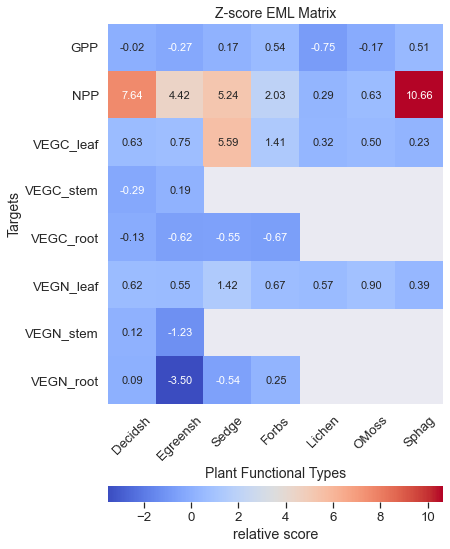

In [23]:
#new
z_eml_matrix = pd.DataFrame({
         'GPP': gpp_eml,
         'NPP': npp_eml,
         'VEGC_leaf': vegc_eml_leaf, 'VEGC_stem': vegc_eml_stem, 'VEGC_root': vegc_eml_root,
         'VEGN_leaf': vegn_eml_leaf, 'VEGN_stem': vegn_eml_stem, 'VEGN_root': vegn_eml_root
        })
z_eml_matrix.index=['Decidsh', 'Egreensh', 'Sedge', 'Forbs', 'Lichen', 'OMoss', 'Sphag']

site_metric_matrix(z_eml_matrix.T, 'Z-score EML')

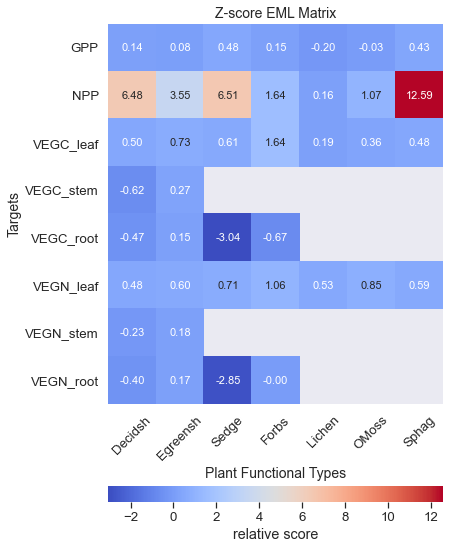

In [10]:
z_eml_matrix = pd.DataFrame({
         'GPP': gpp_eml,
         'NPP': npp_eml,
         'VEGC_leaf': vegc_eml_leaf, 'VEGC_stem': vegc_eml_stem, 'VEGC_root': vegc_eml_root,
         'VEGN_leaf': vegn_eml_leaf, 'VEGN_stem': vegn_eml_stem, 'VEGN_root': vegn_eml_root
        })
z_eml_matrix.index=['Decidsh', 'Egreensh', 'Sedge', 'Forbs', 'Lichen', 'OMoss', 'Sphag']

site_metric_matrix(z_eml_matrix.T, 'Z-score EML')

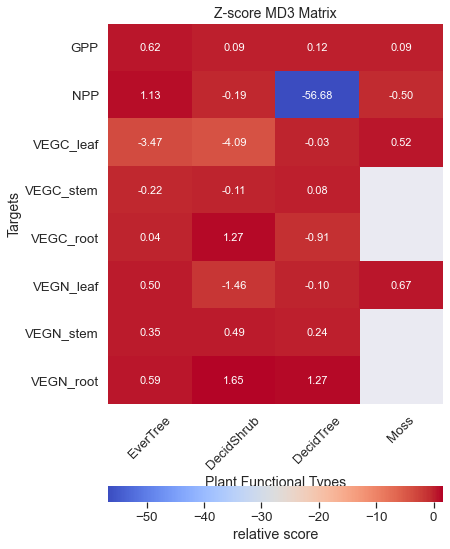

In [24]:
#new
z_md3_matrix = pd.DataFrame({
         'GPP': gpp_md3,
         'NPP': npp_md3,
         'VEGC_leaf': vegc_md3_leaf, 'VEGC_stem': vegc_md3_stem, 'VEGC_root': vegc_md3_root,
         'VEGN_leaf': vegn_md3_leaf, 'VEGN_stem': vegn_md3_stem, 'VEGN_root': vegn_md3_root
        })
z_md3_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

site_metric_matrix(z_md3_matrix.T, 'Z-score MD3')

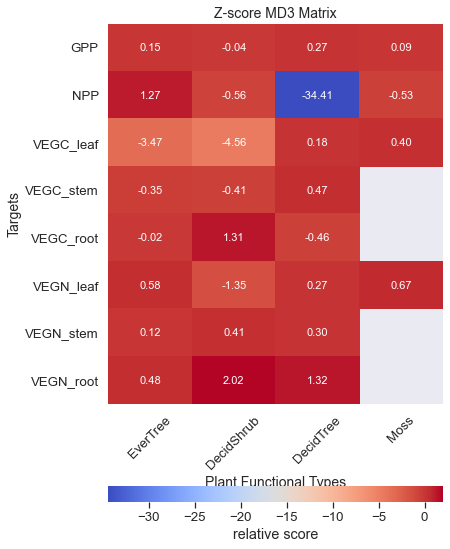

In [90]:
z_md3_matrix = pd.DataFrame({
         'GPP': gpp_md3,
         'NPP': npp_md3,
         'VEGC_leaf': vegc_md3_leaf, 'VEGC_stem': vegc_md3_stem, 'VEGC_root': vegc_md3_root,
         'VEGN_leaf': vegn_md3_leaf, 'VEGN_stem': vegn_md3_stem, 'VEGN_root': vegn_md3_root
        })
z_md3_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

site_metric_matrix(z_md3_matrix.T, 'Z-score MD3')

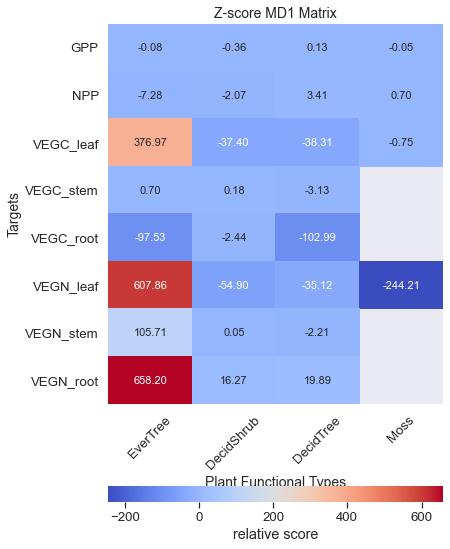

In [25]:
#new
z_md1_matrix = pd.DataFrame({
         'GPP': gpp_md1,
         'NPP': npp_md1,
         'VEGC_leaf': vegc_md1_leaf, 'VEGC_stem': vegc_md1_stem, 'VEGC_root': vegc_md1_root,
         'VEGN_leaf': vegn_md1_leaf, 'VEGN_stem': vegn_md1_stem, 'VEGN_root': vegn_md1_root
        })
z_md1_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

site_metric_matrix(z_md1_matrix.T, 'Z-score MD1')

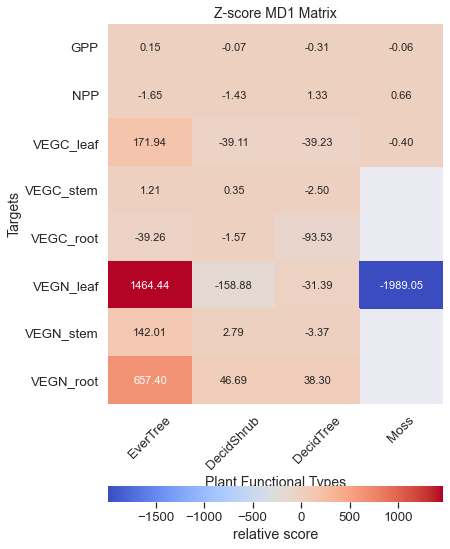

In [92]:
z_md1_matrix = pd.DataFrame({
         'GPP': gpp_md1,
         'NPP': npp_md1,
         'VEGC_leaf': vegc_md1_leaf, 'VEGC_stem': vegc_md1_stem, 'VEGC_root': vegc_md1_root,
         'VEGN_leaf': vegn_md1_leaf, 'VEGN_stem': vegn_md1_stem, 'VEGN_root': vegn_md1_root
        })
z_md1_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

site_metric_matrix(z_md1_matrix.T, 'Z-score MD1')

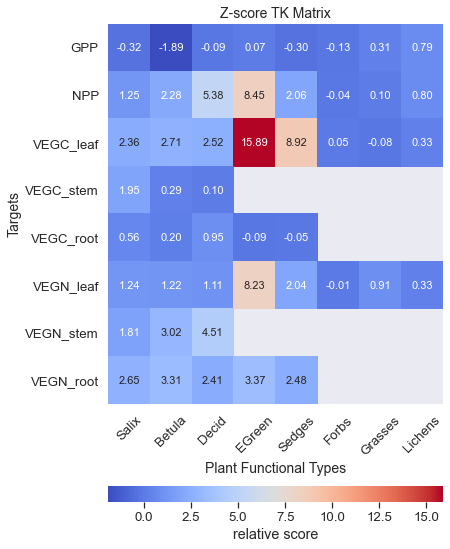

In [26]:
#new
z_tk_matrix = pd.DataFrame({
         'GPP': gpp_tk,
         'NPP': npp_tk,
         'VEGC_leaf': vegc_zk_leaf, 'VEGC_stem': vegc_zk_stem, 'VEGC_root': vegc_zk_root,
         'VEGN_leaf': vegn_zk_leaf, 'VEGN_stem': vegn_zk_stem, 'VEGN_root': vegn_zk_root
        })
z_tk_matrix.index=['Salix', 'Betula', 'Decid', 'EGreen', 'Sedges', 'Forbs', 'Grasses', 'Lichens']

site_metric_matrix(z_tk_matrix.T, 'Z-score TK')

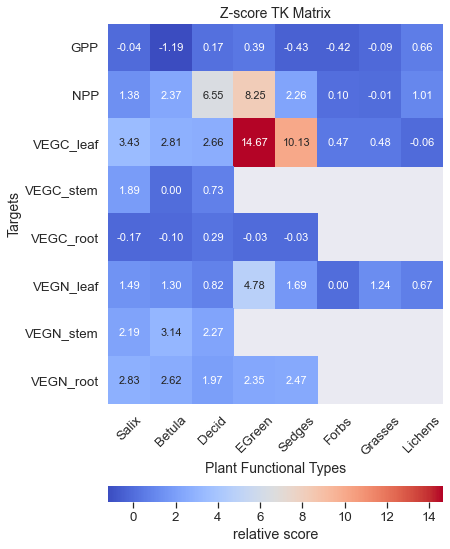

In [96]:
z_tk_matrix = pd.DataFrame({
         'GPP': gpp_tk,
         'NPP': npp_tk,
         'VEGC_leaf': vegc_zk_leaf, 'VEGC_stem': vegc_zk_stem, 'VEGC_root': vegc_zk_root,
         'VEGN_leaf': vegn_zk_leaf, 'VEGN_stem': vegn_zk_stem, 'VEGN_root': vegn_zk_root
        })
z_tk_matrix.index=['Salix', 'Betula', 'Decid', 'EGreen', 'Sedges', 'Forbs', 'Grasses', 'Lichens']

site_metric_matrix(z_tk_matrix.T, 'Z-score TK')

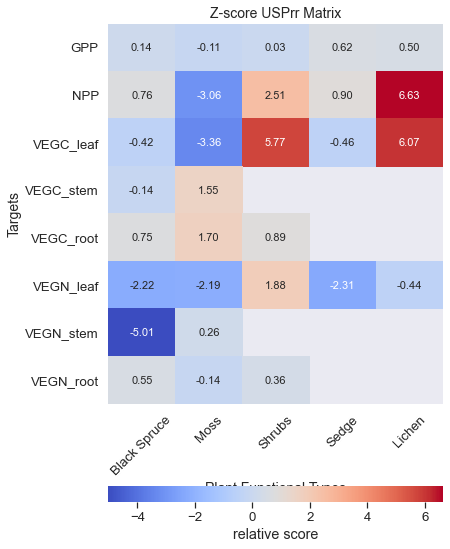

In [27]:
#new
z_USPrr_matrix = pd.DataFrame({
         'GPP': gpp_USPrr,
         'NPP': npp_USPrr,
         'VEGC_leaf': vegc_USPrr_leaf, 'VEGC_stem': vegc_USPrr_stem, 'VEGC_root': vegc_USPrr_root,
         'VEGN_leaf': vegn_USPrr_leaf, 'VEGN_stem': vegn_USPrr_stem, 'VEGN_root': vegn_USPrr_root
        })
z_USPrr_matrix.index=['Black Spruce', 'Moss', 'Shrubs', 'Sedge', 'Lichen']

site_metric_matrix(z_USPrr_matrix.T, 'Z-score USPrr')

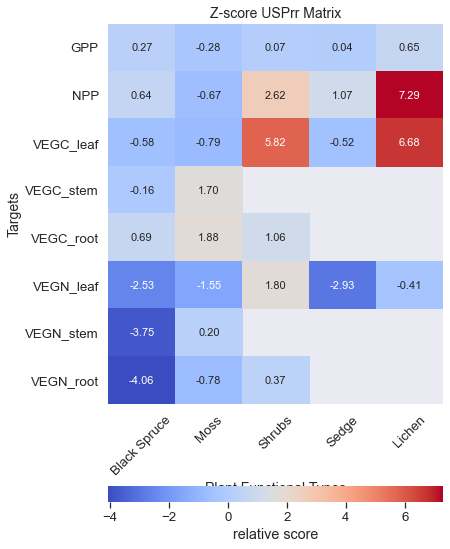

In [101]:
z_USPrr_matrix = pd.DataFrame({
         'GPP': gpp_USPrr,
         'NPP': npp_USPrr,
         'VEGC_leaf': vegc_USPrr_leaf, 'VEGC_stem': vegc_USPrr_stem, 'VEGC_root': vegc_USPrr_root,
         'VEGN_leaf': vegn_USPrr_leaf, 'VEGN_stem': vegn_USPrr_stem, 'VEGN_root': vegn_USPrr_root
        })
z_USPrr_matrix.index=['Black Spruce', 'Moss', 'Shrubs', 'Sedge', 'Lichen']

site_metric_matrix(z_USPrr_matrix.T, 'Z-score USPrr')

# All above ground targets

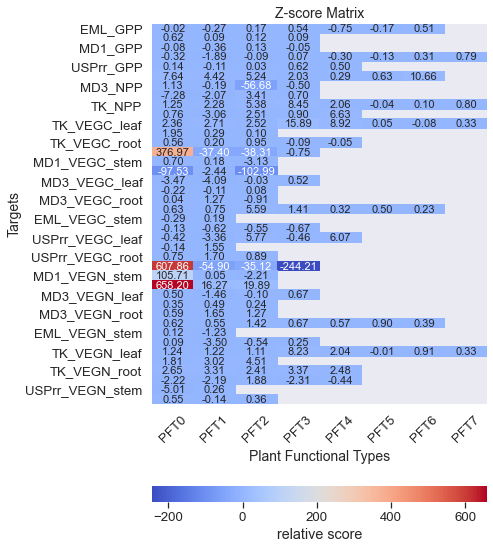

In [28]:
z_matrix = pd.DataFrame({
         'EML_GPP': gpp_eml,'MD3_GPP': gpp_md3,'MD1_GPP': gpp_md1,
         'TK_GPP': gpp_tk,'USPrr_GPP':gpp_USPrr,
         'EML_NPP': npp_eml,'MD3_NPP': npp_md3,'MD1_NPP': npp_md1,
         'TK_NPP': npp_tk,'USPrr_NPP':npp_USPrr,
         'TK_VEGC_leaf':  vegc_zk_leaf, 'TK_VEGC_stem': vegc_zk_stem, 'TK_VEGC_root': vegc_zk_root,
         'MD1_VEGC_leaf': vegc_md1_leaf, 'MD1_VEGC_stem': vegc_md1_stem, 'MD1_VEGC_root': vegc_md1_root,
         'MD3_VEGC_leaf': vegc_md3_leaf, 'MD3_VEGC_stem': vegc_md3_stem, 'MD3_VEGC_root': vegc_md3_root,
         'EML_VEGC_leaf': vegc_eml_leaf, 'EML_VEGC_stem': vegc_eml_stem, 'EML_VEGC_root': vegc_eml_root,
         'USPrr_VEGC_leaf': vegc_USPrr_leaf, 'USPrr_VEGC_stem': vegc_USPrr_stem, 
         'USPrr_VEGC_root': vegc_USPrr_root,
        'MD1_VEGN_leaf': vegn_md1_leaf, 'MD1_VEGN_stem': vegn_md1_stem, 'MD1_VEGN_root': vegn_md1_root,
        'MD3_VEGN_leaf': vegn_md3_leaf, 'MD3_VEGN_stem': vegn_md3_stem, 'MD3_VEGN_root': vegn_md3_root,
        'EML_VEGN_leaf': vegn_eml_leaf, 'EML_VEGN_stem': vegn_eml_stem, 'EML_VEGN_root': vegn_eml_root,
        'TK_VEGN_leaf':  vegn_zk_leaf, 'TK_VEGN_stem': vegn_zk_stem, 'TK_VEGN_root': vegn_zk_root,
        'USPrr_VEGN_leaf': vegn_USPrr_leaf, 'USPrr_VEGN_stem': vegn_USPrr_stem, 
         'USPrr_VEGN_root': vegn_USPrr_root,
})
z_matrix.index=['PFT0','PFT1','PFT2','PFT3','PFT4','PFT5','PFT6','PFT7']
site_metric_matrix(z_matrix.T, 'Z-score')

# soil parameters -> below-ground targets (new)

In [33]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


# soil parameters -> below-ground targets

In [29]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=per_number)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=.45)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.98)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.94)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK,df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML,df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3,df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1,df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


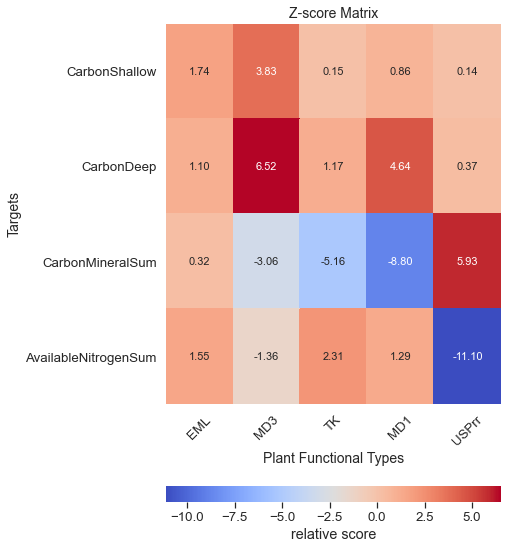

In [34]:
#new
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

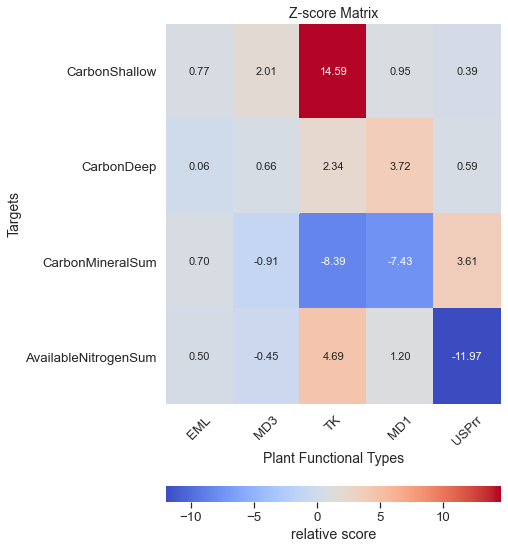

In [30]:
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

In [7]:
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]
ymodel_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [98]:
ymodel_USPrr.sort_values(by=['R2'],ascending=False)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [83]:
xparams_USPrr.sort_values(by=['r2rmsemape'],ascending=True)[:10]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,1.034717,0.159833,0.071426,0.005763,0.000017,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,1.448248,0.650197,0.568469,0.003083,0.000022,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,0.564732,0.208677,0.766171,0.003207,0.000100,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,1.545538,0.493957,0.014622,0.003251,0.000036,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,1.202606,0.508619,0.234107,0.002610,0.000050,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,1.348196,0.967239,0.086005,0.003072,0.000043,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,1.866178,0.020034,0.127258,0.221657,0.000046,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,0.898986,0.122303,0.168754,0.001235,0.000004,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,1.616240,0.119093,0.216138,0.005371,0.000029,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,1.853501,0.019023,0.384091,0.172243,0.000072,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963
